In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
df=pd.read_csv('yahoo_stock.csv')

In [2]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [3]:
df.shape

(1825, 7)

In [4]:
len(df['Date'].unique())

1825

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [6]:
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [7]:
df.Date=pd.to_datetime(df['Date'])

In [8]:
df.Date.min(),df.Date.max()

(Timestamp('2015-11-23 00:00:00'), Timestamp('2020-11-20 00:00:00'))

In [9]:
df.set_index('Date',inplace=True)

In [10]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


<Axes: xlabel='Date'>

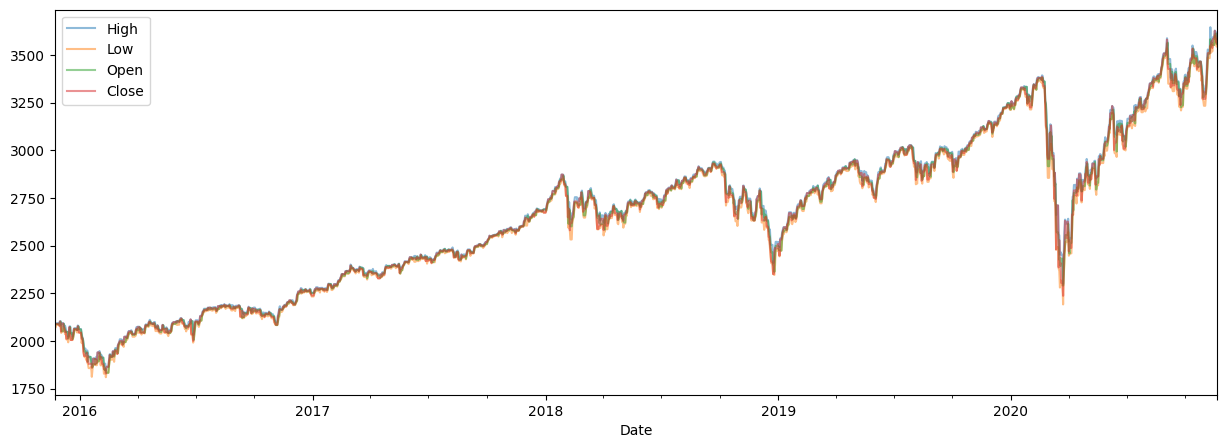

In [11]:
df[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)

<Axes: >

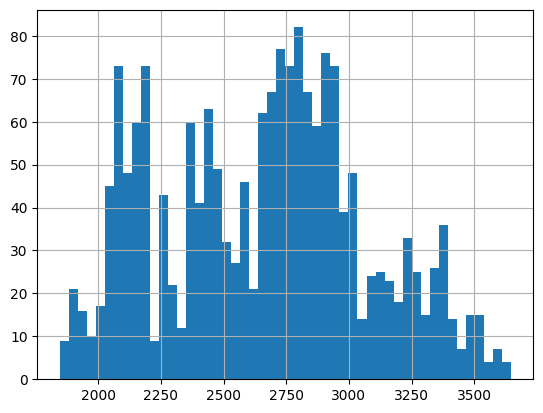

In [12]:
df.High.hist(bins=50)

In [13]:
np.round(df.shape[0]/10,0)

182.0

In [14]:
from statistics import stdev
mean=[]
std=[]

for i in range(0,10):
    mean.append(df['High'].iloc[(i*182):(i*182)+182].mean())
    std.append(stdev(df['High'].iloc[(i*182):(i*182)+182]))

In [15]:
pd.concat([pd.DataFrame(mean,columns=['mean']),pd.DataFrame(std,columns=['std'])], axis=1)

,mean,std
0,2019.354300,71.041024
1,2147.740282,36.287599
2,2322.969570,60.228422
3,2489.706581,55.878102
4,2711.253743,63.125935
5,2816.088946,68.351685
6,2754.165647,131.792411
7,2965.153137,74.059325
8,3045.669328,267.695412
9,3309.076588,165.733813


In [16]:
new_df=df['High'].iloc[:-4]

In [17]:
train_len = math.ceil(len(new_df)*0.8)
train_len

1457

In [18]:
window=10
train_data = new_df[0:train_len]

X_train=[]
Y_train=[]

for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

In [19]:
X_train, Y_train= np.array(X_train), np.array(Y_train)

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1447, 10, 1)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [22]:
model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11701 (45.71 KB)
Trainable params: 11701 (45.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
test_data = new_df[train_len-window:]

X_val=[]
Y_val=[]

for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])

In [24]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [25]:
prediction = model.predict(X_val)

12/12 [==============================] - 0s 4ms/step


In [26]:
len(prediction), len(Y_val)

(364, 364)

In [27]:
from sklearn.metrics import mean_squared_error
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

12/12 [==============================] - 0s 7ms/step
Train rmse: 34.88868259080918
Validation rmse: 94.54129152345021


In [28]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,High,Predictions
Date,,
2019-11-19,3127.639893,3115.428711
2019-11-20,3118.969971,3118.611084
2019-11-21,3110.110107,3122.634766
2019-11-22,3112.870117,3126.789062
2019-11-23,3112.870117,3128.434326
...,...,...
2020-11-12,3569.020020,3493.563721
2020-11-13,3593.659912,3538.690674
2020-11-14,3593.659912,3555.761230


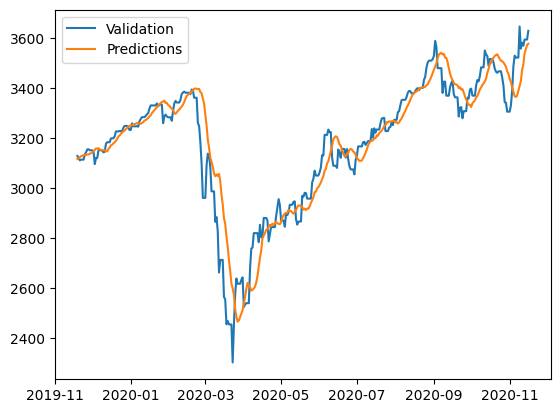

In [29]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

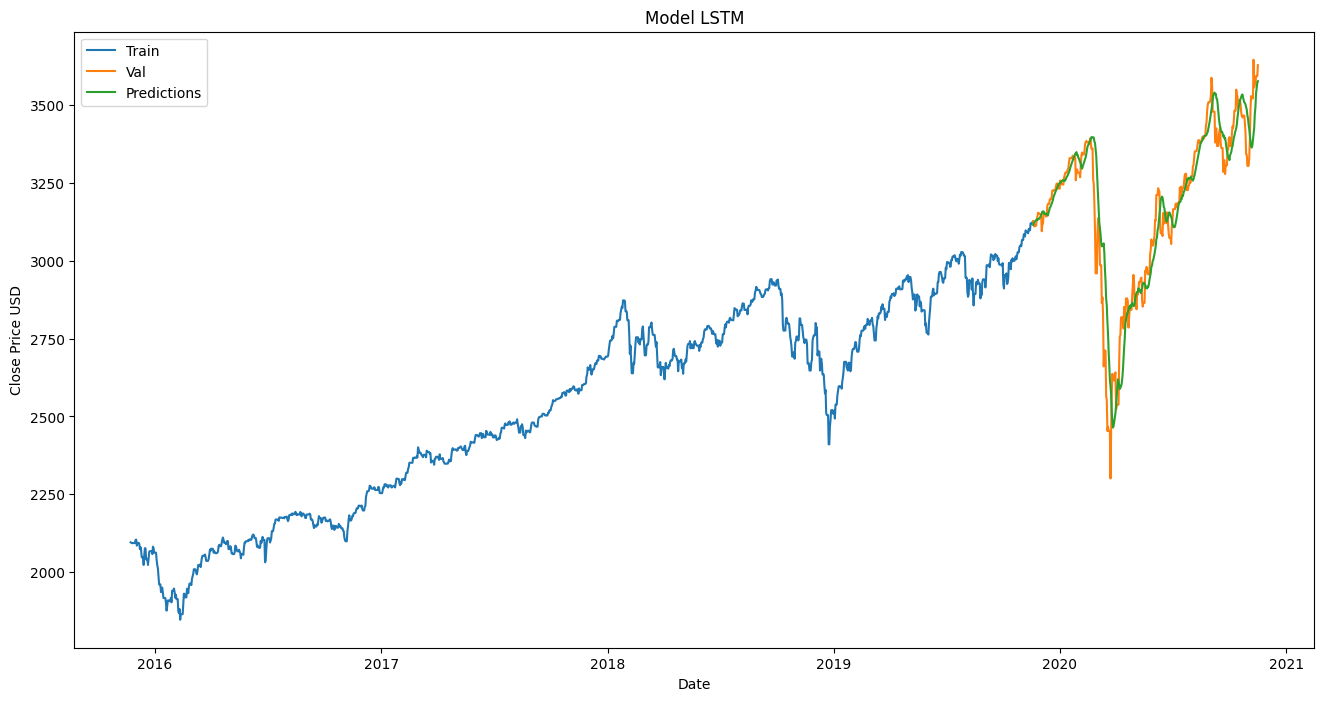

In [30]:
train = new_df[:train_len]
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

In [31]:
train_error=[]
val_error=[]

window_number=[5,8,10,15,20,30,40]
for i in window_number:
    train_data = new_df[0:train_len]

    X_train=[]
    Y_train=[]

    for i in range(window, len(train_data)):
        X_train.append(train_data[i-window:i])
        Y_train.append(train_data[i])

    X_train, Y_train= np.array(X_train), np.array(Y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    test_data = new_df[train_len-window:]

    X_val=[]
    Y_val=[]

    for i in range(window, len(test_data)):
        X_val.append(test_data[i-window:i])
        Y_val.append(test_data[i])

    X_val, Y_val = np.array(X_val), np.array(Y_val)
    X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
    model=Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    train_error.append(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
    val_error.append(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

12/12 [==============================] - 0s 4ms/step


In [32]:
train_error

[34.384576067471365,
 32.04530525523975,
 34.67792985996931,
 30.001166352062842,
 29.821929845322337,
 32.60230572870396,
 17.371755513383555]

In [33]:
val_error

[121.73062393772304,
 92.58055456421442,
 91.86929067735532,
 75.55766568338804,
 81.59956256542733,
 87.61901160809997,
 56.62915158341124]

In [34]:
pd.concat([pd.DataFrame(train_error,columns=['train_error']),
           pd.DataFrame(val_error,columns=['val_error']),
           pd.DataFrame([5,8,10,15,20,30,40],columns=['window'])], axis=1).set_index('window')

,train_error,val_error
window,,
5,34.384576,121.730624
8,32.045305,92.580555
10,34.677930,91.869291
15,30.001166,75.557666
20,29.821930,81.599563
30,32.602306,87.619012
40,17.371756,56.629152


In [35]:
window=10

train_data = new_df[0:train_len]
X_train=[]
Y_train=[]
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

X_train, Y_train= np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
test_data = new_df[train_len-window:]
X_val=[]
Y_val=[]
for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])

X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [36]:
import tensorflow as tf
model=Sequential()
model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999))
model.summary()
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_16 (Dense)            (None, 100)               5100      
                                                                 
 dense_17 (Dense)            (None, 25)                2525      
                                                                 
 dense_18 (Dense)            (None, 1)                 26        
                                                                 
Total params: 38251 (149.42 KB)
Trainable params: 38251 (149.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

12/12 [==============================] - 0s 6ms/step
Train rmse: 16.63213609751286
Validation rmse: 44.14852432003643


In [38]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

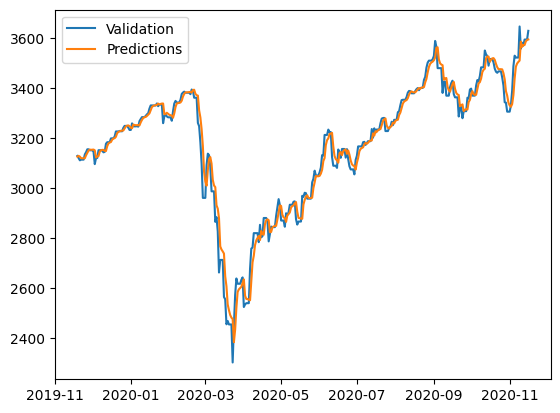

In [39]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [40]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(LSTM(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

12/12 [==============================] - 0s 5ms/step


In [41]:
import statistics
r1, statistics.mean(r1), statistics.stdev(r1)

([16.46, 23.7, 28.84, 34.39, 32.26, 23.29, 49.61, 28.1, 39.85, 37.51],
 31.401,
 9.52031564602771)

In [42]:
r2, statistics.mean(r2), statistics.stdev(r2)

([40.92, 64.44, 81.07, 90.13, 80.16, 58.76, 87.92, 79.87, 82.22, 76.55],
 74.204,
 15.15814060716771)

In [43]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1),recurrent_dropout=0.2))
    model.add(LSTM(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

12/12 [==============================] - 0s 8ms/step


In [44]:
r1, statistics.mean(r1), statistics.stdev(r1)

([60.23, 38.77, 47.34, 36.31, 37.93, 131.81, 35.92, 25.65, 35.05, 29.46],
 47.847,
 31.009008386452976)

In [45]:
r2, statistics.mean(r2), statistics.stdev(r2)

([111.08, 93.62, 91.23, 92.51, 95.72, 179.73, 84.09, 68.91, 94.73, 51.93],
 96.355,
 33.49465770006381)

In [46]:
from keras.layers import SimpleRNN

In [47]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

12/12 [==============================] - 0s 4ms/step


In [48]:
r1, statistics.mean(r1), statistics.stdev(r1)

([16.57, 18.85, 14.05, 23.28, 20.01, 15.45, 21.61, 14.54, 26.46, 14.51],
 18.533,
 4.251867694189095)

In [49]:
r2, statistics.mean(r2), statistics.stdev(r2)

([39.23, 40.13, 37.26, 44.35, 41.59, 38.32, 42.29, 37.49, 46.32, 37.42],
 40.44,
 3.137539729717467)

In [50]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,High,Predictions
Date,,
2019-11-19,3127.639893,3130.458252
2019-11-20,3118.969971,3132.166260
2019-11-21,3110.110107,3124.407959
2019-11-22,3112.870117,3114.874268
2019-11-23,3112.870117,3117.329590
...,...,...
2020-11-12,3569.020020,3592.690430
2020-11-13,3593.659912,3571.008301
2020-11-14,3593.659912,3595.406738


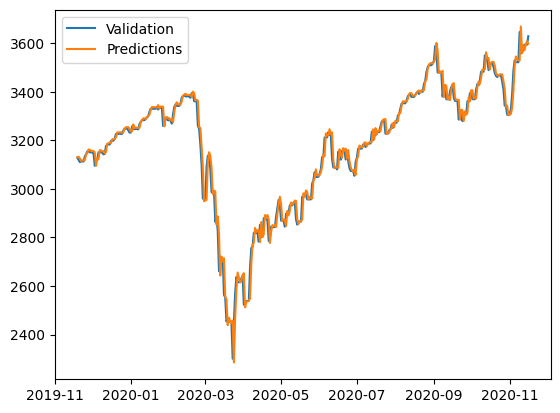

In [51]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [52]:
import tensorflow

r1=[]
r2=[]

model=Sequential()
model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
lr_schedule = tensorflow.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 85))
opt1=tf.keras.optimizers.Adam(learning_rate=1e-5,beta_1=0.9,beta_2=0.7)
model.compile(loss='mean_squared_error', optimizer=opt1)
history=model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=2, callbacks=[lr_schedule])

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
r_train_new=np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2)
r_val_new=np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2)

Epoch 1/100
145/145 - 4s - loss: 4442059.5000 - lr: 1.0000e-05 - 4s/epoch - 24ms/step
Epoch 2/100
145/145 - 1s - loss: 1422043.5000 - lr: 1.0275e-05 - 1s/epoch - 7ms/step
Epoch 3/100
145/145 - 1s - loss: 57922.1172 - lr: 1.0557e-05 - 992ms/epoch - 7ms/step
Epoch 4/100
145/145 - 1s - loss: 357.9646 - lr: 1.0847e-05 - 1s/epoch - 7ms/step
Epoch 5/100
145/145 - 1s - loss: 350.7489 - lr: 1.1144e-05 - 1s/epoch - 7ms/step
Epoch 6/100
145/145 - 1s - loss: 363.6270 - lr: 1.1450e-05 - 1s/epoch - 10ms/step
Epoch 7/100
145/145 - 1s - loss: 341.4731 - lr: 1.1765e-05 - 1s/epoch - 10ms/step
Epoch 8/100
145/145 - 1s - loss: 342.3664 - lr: 1.2088e-05 - 1s/epoch - 9ms/step
Epoch 9/100
145/145 - 1s - loss: 329.8608 - lr: 1.2420e-05 - 1s/epoch - 7ms/step
Epoch 10/100
145/145 - 1s - loss: 339.2698 - lr: 1.2761e-05 - 1s/epoch - 7ms/step
Epoch 11/100
145/145 - 1s - loss: 314.9352 - lr: 1.3111e-05 - 982ms/epoch - 7ms/step
Epoch 12/100
145/145 - 1s - loss: 329.4928 - lr: 1.3471e-05 - 984ms/epoch - 7ms/step
Epo

(1e-05, 0.0005, 0.0, 1000.0)

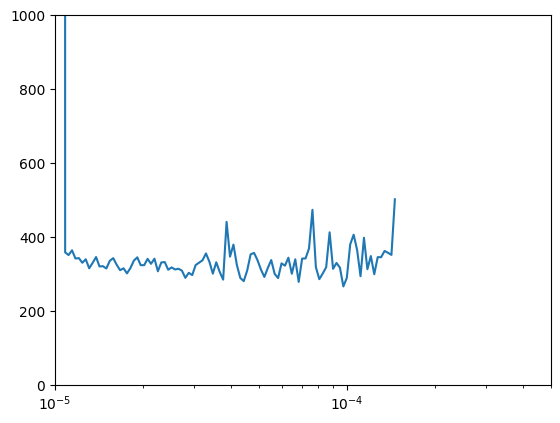

In [53]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-5, 5e-4, 0, 1000])

In [54]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=tf.keras.optimizers.Adam(learning_rate=1e-4,beta_1=0.9,beta_2=0.7)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

12/12 [==============================] - 0s 7ms/step


In [55]:
r1, statistics.mean(r1), statistics.stdev(r1)

([15.07, 14.19, 14.92, 15.13, 15.06, 16.94, 17.12, 20.96, 16.69, 15.56],
 16.164,
 1.9461711698158062)

In [56]:
r2, statistics.mean(r2), statistics.stdev(r2)

([38.3, 38.08, 38.39, 38.48, 39.45, 39.87, 39.29, 42.39, 39.85, 38.77],
 39.287,
 1.2678157069017042)

In [57]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,High,Predictions
Date,,
2019-11-19,3127.639893,3118.043701
2019-11-20,3118.969971,3119.531982
2019-11-21,3110.110107,3112.991699
2019-11-22,3112.870117,3103.468750
2019-11-23,3112.870117,3104.225830
...,...,...
2020-11-12,3569.020020,3574.220703
2020-11-13,3593.659912,3566.374512
2020-11-14,3593.659912,3573.926758


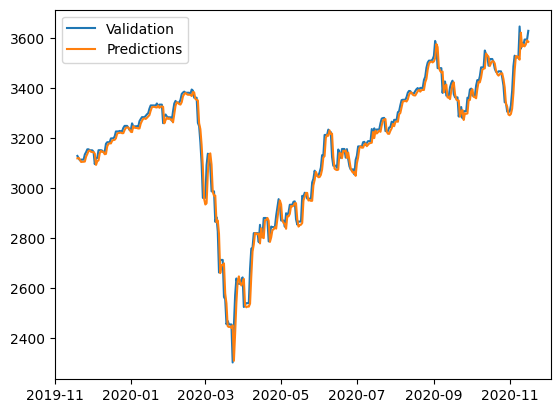

In [58]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [59]:
last_10_days=new_df[-10:].values
X_test=[]
X_test.append(last_10_days)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
print(pred_price)

1/1 [==============================] - 0s 34ms/step
[[3618.8142]]


In [60]:
df['High'].iloc[-4]

3623.110107421875

In [61]:
df['High'].iloc[-4]-pred_price

array([[4.2958984]], dtype=float32)

In [62]:
df.High.tail(14)

Date
2020-11-07    3521.580078
2020-11-08    3521.580078
2020-11-09    3645.989990
2020-11-10    3557.219971
2020-11-11    3581.159912
2020-11-12    3569.020020
2020-11-13    3593.659912
2020-11-14    3593.659912
2020-11-15    3593.659912
2020-11-16    3628.510010
2020-11-17    3623.110107
2020-11-18    3619.090088
2020-11-19    3585.219971
2020-11-20    3581.229980
Name: High, dtype: float64

In [63]:
last_9_days=new_df[-9:].values
X_test=[]
X_test=np.append(last_9_days,pred_price)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price2=model.predict(X_test)
print(pred_price2)

1/1 [==============================] - 0s 56ms/step
[[3613.0679]]


In [64]:
df['High'].iloc[-3]

3619.090087890625

In [65]:
df['High'].iloc[-3]-pred_price2

array([[6.022217]], dtype=float32)

In [66]:
last_8_days=new_df[-8:].values
X_test=[]
X_test=np.append(last_8_days,pred_price)
X_test=np.append(X_test,pred_price2)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price3=model.predict(X_test)
print(pred_price3)

1/1 [==============================] - 0s 39ms/step
[[3606.4849]]


In [67]:
df['High'].iloc[-2]

3585.219970703125

In [68]:
df['High'].iloc[-2]-pred_price3

array([[-21.264893]], dtype=float32)

In [69]:
last_7_days=new_df[-7:].values
X_test=[]
X_test=np.append(last_7_days, pred_price)
X_test=np.append(X_test, pred_price2)
X_test=np.append(X_test, pred_price3)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price4=model.predict(X_test)
print(pred_price4)

1/1 [==============================] - 0s 35ms/step
[[3600.1309]]


In [70]:
df['High'].iloc[-1]

3581.22998046875

In [71]:
df['High'].iloc[-1]-pred_price4

array([[-18.900879]], dtype=float32)

In [72]:
df.High.iloc[-4], df.High.iloc[-3], df.High.iloc[-2], df.High.iloc[-1]

(3623.110107421875, 3619.090087890625, 3585.219970703125, 3581.22998046875)

In [73]:
pred_price, pred_price2, pred_price3, pred_price4

(array([[3618.8142]], dtype=float32),
 array([[3613.0679]], dtype=float32),
 array([[3606.4849]], dtype=float32),
 array([[3600.1309]], dtype=float32))

In [74]:
actual_prices=np.array([df.High.iloc[-4], df.High.iloc[-3], df.High.iloc[-2], df.High.iloc[-1]])
pred_prices=np.array([float(pred_price),float(pred_price2),float(pred_price3),float(pred_price4)])

<ipython-input-74-bf95f982bb0c>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_prices=np.array([float(pred_price),float(pred_price2),float(pred_price3),float(pred_price4)])


In [75]:
actual_prices, pred_prices

(array([3623.11010742, 3619.09008789, 3585.2199707 , 3581.22998047]),
 array([3618.81420898, 3613.06787109, 3606.48486328, 3600.13085938]))

In [76]:
data={'Actual values':[df.High.iloc[-4],df.High.iloc[-3],df.High.iloc[-2],df.High.iloc[-1]],
      'Predicted values':[float(pred_price),float(pred_price2),float(pred_price3),float(pred_price4)]}

pd.DataFrame(data, index=['2020-11-17','2020-11-18','2020-11-19','2020-11-20'])

<ipython-input-76-86f46b89c07b>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'Predicted values':[float(pred_price),float(pred_price2),float(pred_price3),float(pred_price4)]}


,Actual values,Predicted values
2020-11-17,3623.110107,3618.814209
2020-11-18,3619.090088,3613.067871
2020-11-19,3585.219971,3606.484863
2020-11-20,3581.229980,3600.130859


[(3540.0, 3700.0)]

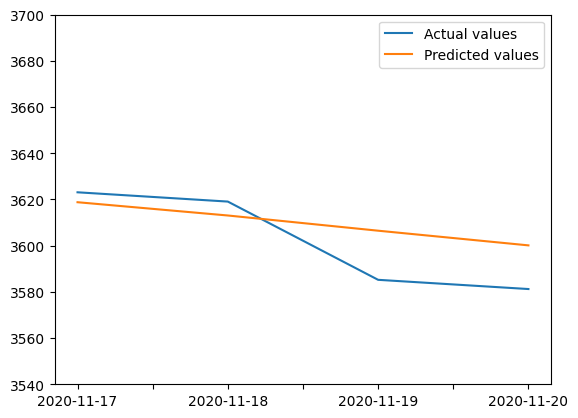

In [77]:
fut=pd.DataFrame(data, index=['2020-11-17','2020-11-18','2020-11-19','2020-11-20']).plot()
fut.set(ylim=(3540,3700))

In [78]:
np.round(np.sqrt(mean_squared_error(actual_prices, pred_prices)),2)

14.7